In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd
df = pd.read_csv("Z:\\7th sem\\dataanalytics\\traffic-collision.csv")


In [6]:
df.isnull().any()


DR Number                            False
Date Reported                        False
Date Occurred                        False
Time_Occurred                        False
Area_ID                              False
Area Name                            False
Reporting District                   False
Crime Code                           False
Crime Code Description               False
MO Codes                              True
Victim_Age                            True
Victim Sex                            True
Victim Descent                        True
Premise Code                          True
Premise Description                   True
Address                              False
Cross Street                          True
Location                             False
Zip Codes                             True
Census Tracts                         True
Precinct Boundaries                   True
LA Specific Plans                     True
Council Districts                     True
Neighborhoo

In [7]:
df.fillna(value=0,axis=1,inplace=True)
df.shape

(475227, 24)

In [8]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(df,test_size=0.30)
train.head()

,DR Number,Date Reported,Date Occurred,Time_Occurred,Area_ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
343730,180121726,2018-08-19T00:00:00.000,2018-08-19T00:00:00.000,1800,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030 3032,...,STREET,S FIGUEROA ST,PICO BL,"{'human_address': '{""address"": """", ""city"": """",...",23076.0,546.0,1227.0,34.0,13.0,76.0
223239,110816038,2011-09-26T00:00:00.000,2011-09-26T00:00:00.000,1400,8,West LA,881,997,TRAFFIC COLLISION,0,...,STREET,BUNDY DR,TENNESSEE PL,"{'human_address': '{""address"": """", ""city"": """",...",24029.0,867.0,1128.0,9.0,10.0,50.0
98561,121708366,2012-03-19T00:00:00.000,2012-03-19T00:00:00.000,830,17,Devonshire,1701,997,TRAFFIC COLLISION,3011 3034 3037 3401 3701 3104 3101,...,STREET,SORRENTO LN,MASON AV,"{'human_address': '{""address"": """", ""city"": """",...",18905.0,66.0,909.0,14.0,2.0,48.0
108881,171321600,2017-10-05T00:00:00.000,2017-10-05T00:00:00.000,900,13,Newton,1372,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,...,STREET,SAN PEDRO ST,56TH ST,"{'human_address': '{""address"": """", ""city"": """",...",22727.0,725.0,895.0,7.0,13.0,0.0
293339,110614662,2011-06-01T00:00:00.000,2011-06-01T00:00:00.000,1620,6,Hollywood,666,997,TRAFFIC COLLISION,0,...,STREET,SUNSET,EL CENTRO,"{'human_address': '{""address"": """", ""city"": """",...",23446.0,423.0,539.0,0.0,8.0,57.0


In [17]:
from sklearn.linear_model import LogisticRegression
#Fill the training and test data with require information
X_train = train['Precinct Boundaries'].dropna().values.reshape((-1, 1))
y_train = train['LA Specific Plans'].dropna()
X_test = test['Precinct Boundaries'].dropna().values.reshape((-1, 1))
y_test = test['LA Specific Plans'].dropna()

In [18]:
from sklearn import linear_model# compute classification accuracy for the linear regression model
from sklearn import metrics # for the check the error and accuracy of the model
lin = linear_model.LinearRegression()
# train the model on the training set
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)
print("Training score: ",lin_score_train)
print("Testing score: ",lin_score_test)

Training score:  0.009857740466346021
Testing score:  0.009485121839789447


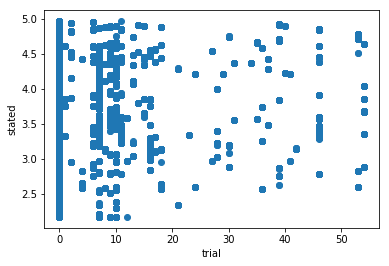

In [20]:
import matplotlib.pyplot as plt
predictions = lin.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel("trial")
plt.ylabel("stated")
plt.show()